(1797, 64)


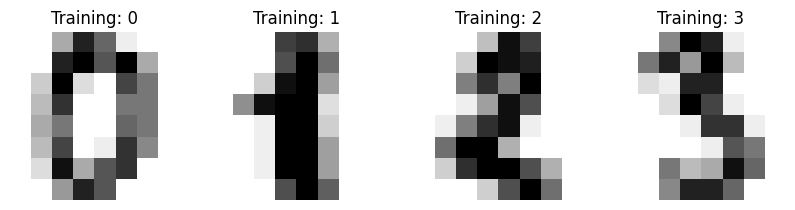

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Feb  5 13:44:31 2023

@author: vidura
"""

import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

import numpy as np

#%%
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)
    
#%%

# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1)) ## new size (64,)

print(data.shape)

In [22]:
#%%
#### Random project data from 64 to dimension d

d      = 1000
n_feat = data.shape[1]

print(f'Dimension : {d}')
print(f'Num of features: {n_feat}')

np.random.seed(4) ## 4

rnd_project =  2 * np.pi * np.random.rand(n_feat, d) # random angles
rnd_project = 1 * np.exp(1j * rnd_project).real # create a phasor vector

### Or read from the file
import pickle
infile1 = open("rnd_project",'rb')
rnd_project = pickle.load(infile1)
infile1.close()


print(rnd_project.shape)
TR_D = np.matmul(data,rnd_project)

TR_D = np.fft.fft(TR_D)

## Normalize each element
for i in range(len(TR_D)):
    for j in range(len(TR_D[i])):
        TR_D[i][j] = TR_D[i][j] / abs(TR_D[i][j] )

#%%

Dimension : 1000
Num of features: 64
(64, 1000)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    TR_D, digits.target, test_size=0.25, shuffle=False)


#%%

In [24]:
import numpy as np
from numpy import dot
from numpy.linalg import norm
import math, cmath

class hdv:
    dim=0
    def __init__(self, dim=0):
        self.dim = dim
        
    def get_rv(self):
        pass
    
    def bind(self, v1, v2):
        pass
    
    def bundle(self, arr_v):
        pass
    
    def similarity(self, v1, v2):
        pass
    
    def set_dim(self, dim):
        self.dim = dim
        
class FHRR(hdv):
    upper = math.pi
    lower = -math.pi
    def get_rv(self):
        angles = np.random.uniform(self.lower, self.upper, self.dim)
        elems = [ cmath.exp(1j*theta) for theta in angles ]
        return np.array(elems)
    
    def bind(self, v1, v2):
        angles_v1 = [cmath.polar(c)[1] for c in v1]
        angles_v2 = [cmath.polar(c)[1] for c in v2]
        sum_rslt =  [ cmath.exp((a1 + a2) * 1j) for a1, a2 in zip(angles_v1, angles_v2) ]
        return np.array(sum_rslt)
    
    def unbind(self, v1, v2):
        angles_v1 = [cmath.polar(c)[1] for c in v1]
        angles_v2 = [cmath.polar(c)[1] for c in v2]
        sum_rslt =  [ cmath.exp((a1 - a2) * 1j) for a1, a2 in zip(angles_v1, angles_v2) ]
        return np.array(sum_rslt)
    
    def bundle(self, arr_v):
        rslt = np.zeros(self.dim)
        for v in arr_v:
            rslt = np.add(rslt, v)
        
        rslt_int = [ cmath.exp((cmath.polar(c)[1])*1j) for c in rslt]
        
        return np.array(rslt_int)
    
    def similarity(self, v1, v2):
        angles_v1 = [cmath.polar(c)[1] for c in v1]
        angles_v2 = [cmath.polar(c)[1] for c in v2]
        
        sum_angles = 0
        for i in range(self.dim):
            sum_angles += (cmath.cos(angles_v1[i].real - angles_v2[i].real)).real
            
        return sum_angles / self.dim

#%%

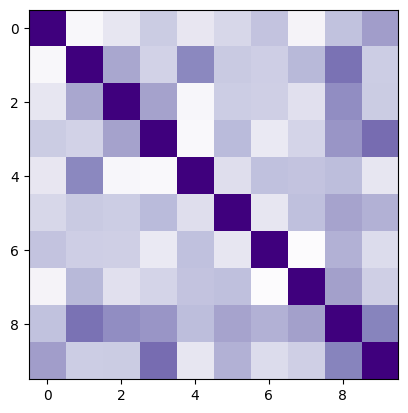

In [25]:
fhrr = FHRR(d)

hd_vec = [ [] for i in range(len(digits.target_names)) ]

for i in range(len(X_train)):
    hd_vec[y_train[i]].append(X_train[i])
    
sum_vec = []

for i in range(len(hd_vec)):
    sum_v = fhrr.bundle(hd_vec[i])
    sum_vec.append(sum_v)
    
#%%

heat_map = np.zeros((10,10))

for i in range(10):
    for j in range(10):
        heat_map[i][j] = fhrr.similarity(sum_vec[i], sum_vec[j])

import matplotlib.pyplot as plt

plt.imshow(heat_map, cmap='Purples', interpolation='nearest')
plt.show()    

9


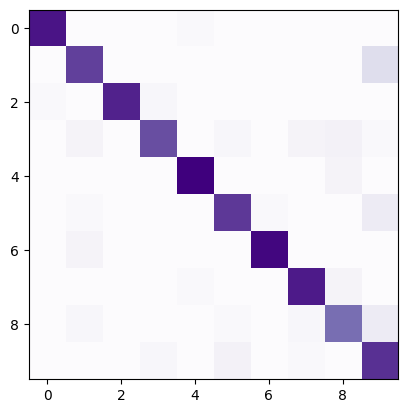

In [26]:
#%%

### Classify

def find_NN(centroids, sample):
    closest = -1
    highest_sim = -1
    for i in range(len(centroids)):
        sim = fhrr.similarity(sample, centroids[i])
        if (sim > highest_sim):
            highest_sim = sim
            closest = i
    
    return closest


print(find_NN(sum_vec, sum_vec[9]))

classification_counts = np.zeros((10,10))

sum_for_each_class = np.zeros(10)

for i in range(len(X_test)):
    classification_counts[y_test[i]][find_NN(sum_vec, X_test[i])] += 1
    sum_for_each_class[y_test[i]] += 1

# for i in range(len(classification_counts)):
    
    

plt.imshow(classification_counts, cmap='Purples', interpolation='nearest')
plt.show()

#%%

In [28]:
## Classification report

predicted = []
for i in range(len(X_test)):
    predicted.append(find_NN(sum_vec, X_test[i]))


print(
    f"Classification report for HD classifier:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for HD classifier:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.80      0.78      0.79        46
           2       1.00      0.93      0.96        43
           3       0.89      0.72      0.80        47
           4       0.96      0.94      0.95        48
           5       0.84      0.82      0.83        45
           6       0.98      0.94      0.96        47
           7       0.87      0.91      0.89        45
           8       0.75      0.73      0.74        41
           9       0.62      0.84      0.72        45

    accuracy                           0.86       450
   macro avg       0.87      0.86      0.86       450
weighted avg       0.87      0.86      0.86       450




## Compare the summation vectors with SNN implementation

In [9]:
import pickle
filename1 = 'sum_vec'
infile1 = open(filename1,'rb')
sum_vec_snn = pickle.load(infile1)
infile1.close()

In [10]:
for i in range(len(sum_vec)):
    print( fhrr.similarity(sum_vec[i], sum_vec_snn[i]) )

IndexError: list index out of range

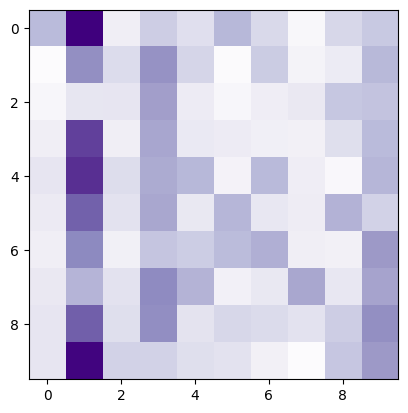

In [10]:
heat_map = np.zeros((10,10))

for i in range(10):
    for j in range(10):
        heat_map[i][j] = fhrr.similarity(sum_vec[i], sum_vec_snn[j])
        
import matplotlib.pyplot as plt

plt.imshow(heat_map, cmap='Purples', interpolation='nearest')
plt.show()  

In [20]:
## Temp
e = 5
steps = 1000
vals = []
vals.append(e)

for i in range(steps):
    vals.append( e + vals[i]/2 )

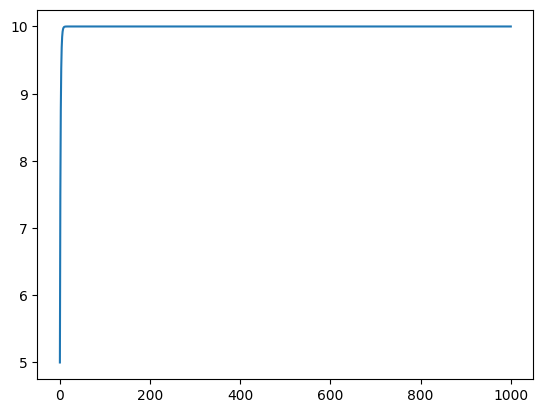

In [21]:
    
plt.plot([i for i in range(len(vals))], vals)